# Método de Interpolación Cuadrática
## Ajuste de polinomio cuadrático por resolución directa del sistema lineal

In [1]:
# Celda 1: Importaciones
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Celda 2: Función objetivo
f = lambda x: x**4 - 4*x**3 + 3*x**2 + 5
# Función ejemplo: x⁴ - 4x³ + 3x² + 5. Buscamos mínimo local en [0, 4].

In [3]:
# Celda 3: Implementación del método de interpolación cuadrática
def metodo_interpolacion_cuadratica(f, a, b, tol=1e-6, max_iter=100):
    iteraciones, x_vals, fx_vals, errores = [], [], [], []
    x_n = (a + b) / 2  # Punto inicial
    
    for i in range(max_iter):
        x_prev = x_n
        # Tres puntos equidistantes para interpolación
        x0, x1, x2 = a, (a + b) / 2, b
        y0, y1, y2 = f(x0), f(x1), f(x2)
        
        # Sistema lineal para P(x) = ax² + bx + c
        # P(x0) = y0, P(x1) = y1, P(x2) = y2
        A = np.array([[x0**2, x0, 1], [x1**2, x1, 1], [x2**2, x2, 1]])
        B = np.array([y0, y1, y2])
        coeff = np.linalg.solve(A, B)
        a_coeff, b_coeff, c_coeff = coeff
        
        # Vértice de la parábola: x = -b/(2a)
        if abs(a_coeff) < 1e-12:
            break
        x_n = -b_coeff / (2 * a_coeff)
        x_n = np.clip(x_n, a, b)
        error = abs(x_n - x_prev)
        
        iteraciones.append(i + 1)
        x_vals.append(x_n)
        fx_vals.append(f(x_n))
        errores.append(error)
        
        # Actualizar intervalo hacia el mínimo
        if x_n < (a + b) / 2:
            b = (a + b) / 2
        else:
            a = (a + b) / 2
        
        if error < tol: break
    
    tabla = pd.DataFrame({'Iteración': iteraciones, 'x_n': x_vals, 'f(x_n)': fx_vals, 'Error_abs': errores})
    return x_n, tabla, x_vals

In [4]:
# Celda 4: Ejecución con caso por defecto
x_opt, tabla, historial = metodo_interpolacion_cuadratica(f, 0, 4)

print("Óptimo encontrado:", x_opt)
print(tabla.round(6))

Óptimo encontrado: 0.5
   Iteración       x_n    f(x_n)  Error_abs
0          1  1.142857  4.653478   0.857143
1          2  0.500000  5.312500   0.642857
2          3  0.500000  5.312500   0.000000


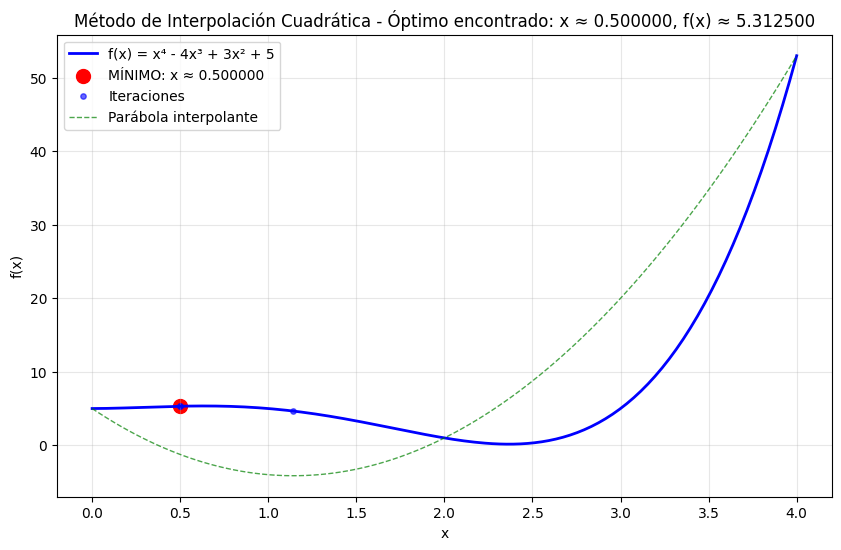

In [5]:
# Celda 5: Gráfica de convergencia
x = np.linspace(0, 4, 200)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2, label='f(x) = x⁴ - 4x³ + 3x² + 5')
plt.scatter(x_opt, f(x_opt), color='red', s=100, label=f'MÍNIMO: x ≈ {x_opt:.6f}')
plt.scatter(historial, [f(xi) for xi in historial], color='blue', s=15, alpha=0.6, label='Iteraciones')

# Mostrar parábola interpolante final
if len(historial) >= 3:
    x0, x1, x2 = 0, 2, 4  # Puntos de interpolación finales
    y0, y1, y2 = f(x0), f(x1), f(x2)
    A = np.array([[x0**2, x0, 1], [x1**2, x1, 1], [x2**2, x2, 1]])
    B = np.array([y0, y1, y2])
    coeff = np.linalg.solve(A, B)
    a_coeff, b_coeff, c_coeff = coeff
    x_poly = np.linspace(0, 4, 100)
    y_poly = a_coeff * x_poly**2 + b_coeff * x_poly + c_coeff
    plt.plot(x_poly, y_poly, 'g--', alpha=0.7, linewidth=1, label='Parábola interpolante')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'Método de Interpolación Cuadrática - Óptimo encontrado: x ≈ {x_opt:.6f}, f(x) ≈ {f(x_opt):.6f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [6]:
# Celda 6: Interfaz interactiva simple
print("=== Método de Interpolación Cuadrática Interactivo ===")

# Función del usuario
f_str = input("Ingrese f(x) (dejar vacío para usar por defecto): ").strip()
if f_str:
    try:
        f_user = lambda x: eval(f_str)
        f_user(2)  # Validar
        f = f_user
        print(f"Usando función: {f_str}")
    except:
        print("Error: función no válida. Usando caso por defecto.")

# Intervalo del usuario
interval_str = input("Ingrese [a,b] (ej. 0,4) o dejar vacío: ").strip()
a, b = 0, 4
if interval_str:
    try:
        vals = [float(x.strip()) for x in interval_str.split(',')]
        if len(vals) == 2:
            a, b = vals
    except:
        print("Intervalo inválido, usando [0,4]")

# Ejecutar método
try:
    x_opt_user, tabla_user, _ = metodo_interpolacion_cuadratica(f, a, b)
    print(f"\nÓptimo encontrado: x = {x_opt_user:.6f}")
    print(tabla_user.tail().round(6))
except Exception as e:
    print(f"Error: {e}")

=== Método de Interpolación Cuadrática Interactivo ===

Óptimo encontrado: x = 0.500000
   Iteración       x_n    f(x_n)  Error_abs
0          1  1.142857  4.653478   0.857143
1          2  0.500000  5.312500   0.642857
2          3  0.500000  5.312500   0.000000
